In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2.3.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [9]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Balancing the Dataset

In [10]:
X = df.drop('Class', axis=1)
y = df.Class

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [13]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2) 
X_train, y_train = sm.fit_sample(X_train, y_train)

<AxesSubplot:>

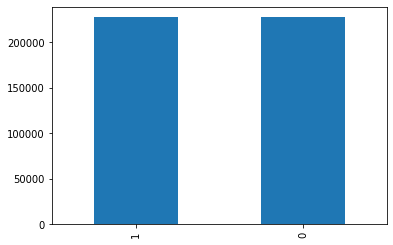

In [14]:
pd.Series(y_train).value_counts().plot.bar()

In [15]:
scale = StandardScaler()

In [16]:
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [17]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

### Reshaping the Dataset for CNN

In [18]:
X_train.shape

(454902, 30)

In [19]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [20]:
X_train.shape, X_test.shape

((454902, 30, 1), (56962, 30, 1))

### Building the Model

In [21]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [23]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
14216/14216 [==============================] - 136s 10ms/step - loss: 0.0736 - accuracy: 0.9741 - val_loss: 0.0307 - val_accuracy: 0.9932
Epoch 2/20
14216/14216 [==============================] - 131s 9ms/step - loss: 0.0364 - accuracy: 0.9872 - val_loss: 0.0209 - val_accuracy: 0.9956
Epoch 3/20
14216/14216 [==============================] - 137s 10ms/step - loss: 0.0273 - accuracy: 0.9906 - val_loss: 0.0197 - val_accuracy: 0.9953
Epoch 4/20
14216/14216 [==============================] - 128s 9ms/step - loss: 0.0225 - accuracy: 0.9926 - val_loss: 0.0173 - val_accuracy: 0.9958
Epoch 5/20
14216/14216 [==============================] - 131s 9ms/step - loss: 0.0195 - accuracy: 0.9936 - val_loss: 0.0133 - val_accuracy: 0.9974
Epoch 6/20
14216/14216 [==============================] - 131s 9ms/step - loss: 0.0180 - accuracy: 0.9943 - val_loss: 0.0133 - val_accuracy: 0.9969
Epoch 7/20
14216/14216 [==============================] - 133s 9ms/step - loss: 0.0161 - accuracy: 0.9949 - va

In [25]:
def plot_learning_curve(history,epoch):
    #Plot training and validation accuracy
    epoch_range = range(0,epoch)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title("Model Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["Train","Val"], loc="upper left")
    plt.show()
    
    #Plot training and validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title("Model Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["Train","Val"], loc="upper left")
    plt.show()

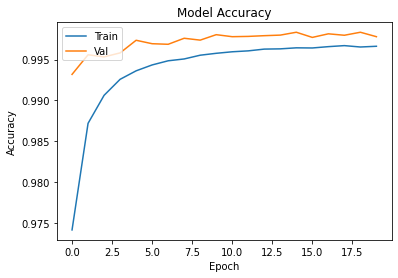

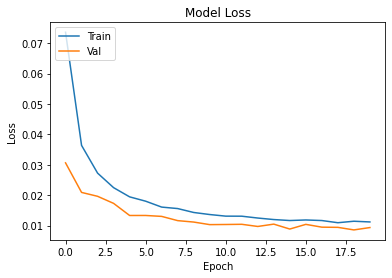

In [26]:
plot_learning_curve(history, epochs)

In [27]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

In [28]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[56751,   113],
       [   12,    86]], dtype=int64)

### Adding Max Pool

In [29]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 32)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 14, 32)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 13, 64)            4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 13, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 6, 64)            

In [31]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
14216/14216 [==============================] - 146s 10ms/step - loss: 0.1186 - accuracy: 0.9581 - val_loss: 0.0330 - val_accuracy: 0.9933
Epoch 2/20
14216/14216 [==============================] - 141s 10ms/step - loss: 0.0653 - accuracy: 0.9769 - val_loss: 0.0346 - val_accuracy: 0.9923
Epoch 3/20
14216/14216 [==============================] - 144s 10ms/step - loss: 0.0535 - accuracy: 0.9811 - val_loss: 0.0269 - val_accuracy: 0.9941
Epoch 4/20
14216/14216 [==============================] - 142s 10ms/step - loss: 0.0469 - accuracy: 0.9837 - val_loss: 0.0268 - val_accuracy: 0.9940
Epoch 5/20
14216/14216 [==============================] - 141s 10ms/step - loss: 0.0433 - accuracy: 0.9851 - val_loss: 0.0291 - val_accuracy: 0.9931
Epoch 6/20
14216/14216 [==============================] - 143s 10ms/step - loss: 0.0398 - accuracy: 0.9864 - val_loss: 0.0251 - val_accuracy: 0.9943
Epoch 7/20
14216/14216 [==============================] - 142s 10ms/step - loss: 0.0370 - accuracy: 0.9871

In [33]:
def plot_learning_curve(history,epoch):
    #Plot training and validation accuracy
    epoch_range = range(0,epoch)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title("Model Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["Train","Val"], loc="upper left")
    plt.show()
    
    #Plot training and validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title("Model Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["Train","Val"], loc="upper left")
    plt.show()

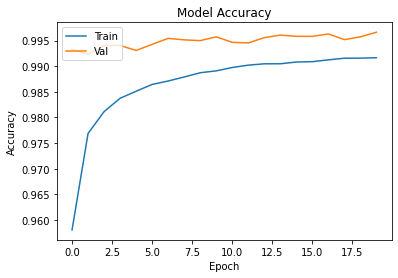

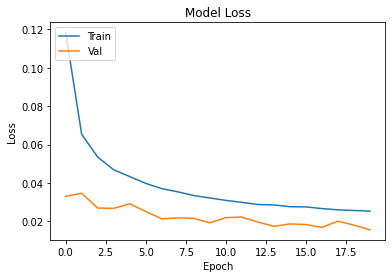

In [34]:
plot_learning_curve(history, epochs)

In [35]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

In [36]:
.
3cm = confusion_matrix(y_test,y_pred)
cm

array([[56683,   181],
       [   11,    87]], dtype=int64)